<a href="https://colab.research.google.com/github/JiseonByeon96/PersonalProject/blob/main/%EC%97%B0%EB%A6%BD%EC%A3%BC%ED%83%9D_%ED%8F%89%EB%8B%B9%EA%B8%88%EC%95%A1_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코드 세팅 

In [1]:
pip install prophet

     |████████████████████████████████| 92kB 4.1MB/s 
  Created wheel for prophet: filename=prophet-0.1.1.post1-cp37-none-any.whl size=13235 sha256=f7c21e9b3837b227b119f9493a399a94750a3bb59642faacd51e912e0c00e5f2
  Stored in directory: /root/.cache/pip/wheels/71/d7/4f/0ade9b5843362f84d39c21edbe6065032e388053c4ab0ab83e
Successfully built prophet


In [2]:
import fbprophet
from fbprophet import Prophet
import pandas as pd
from fbprophet.plot import add_changepoints_to_plot

print(fbprophet.__version__)

0.7.1


# 이벤트 날짜 지정 

In [3]:
holiday = pd.DataFrame({
    'holiday': 'holiday',
    'ds': pd.concat([
        pd.Series(pd.date_range('2017-06-19', '2017-06-20', freq='D')),
        pd.Series(pd.date_range('2017-08-02', '2017-08-03', freq='D')),
        pd.Series(pd.date_range('2018-12-19', '2018-12-20', freq='D')),
        pd.Series(pd.date_range('2019-12-19', '2019-12-20', freq='D')),
        pd.Series(pd.date_range('2020-08-04', '2020-08-05', freq='D'))
    ])
    # lower_window = 0,
    # upper_window = 1
})

# 연립주택 평당금액 


## 매매 

In [13]:
# 매매
df = pd.read_csv('/content/4.세종시_연립다세대(매매)_실거래가.csv', encoding='cp949')
df.head(3)


,계약년월,계약일,시군구,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,평당금액,계약년월일
0,201701,3,세종특별자치시 조치원읍 원리,132,7,고려1동,62.080,36.31,"4,700",2,1983,249.838917,20170103
1,201701,13,세종특별자치시 조치원읍 침산리,167,6,용성빌라,64.230,42.25,"6,500",2,1991,333.956095,20170113
2,201701,18,세종특별자치시 전의면 관정리,262,6,홍성맨션3차,53.965,77.15,"4,300",4,2002,262.948207,20170118


In [14]:
place_split = df['시군구'].str.split()
df['동']=place_split.str.get(1)
df.head(3)

,계약년월,계약일,시군구,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,평당금액,계약년월일,동
0,201701,3,세종특별자치시 조치원읍 원리,132,7,고려1동,62.080,36.31,"4,700",2,1983,249.838917,20170103,조치원읍
1,201701,13,세종특별자치시 조치원읍 침산리,167,6,용성빌라,64.230,42.25,"6,500",2,1991,333.956095,20170113,조치원읍
2,201701,18,세종특별자치시 전의면 관정리,262,6,홍성맨션3차,53.965,77.15,"4,300",4,2002,262.948207,20170118,전의면


In [15]:
df.drop(['계약년월', '계약일', '시군구', '본번', '부번', '건물명', '전용면적(㎡)', '대지권면적(㎡)', '층', '건축년도', '거래금액(만원)'], axis=1, inplace=True)

df['계약년월일'] = df['계약년월일'].astype('str')
df['계약년월일'] = pd.to_datetime(df['계약년월일'])

df.head(3)

,평당금액,계약년월일,동
0,249.838917,2017-01-03,조치원읍
1,333.956095,2017-01-13,조치원읍
2,262.948207,2017-01-18,전의면


### 보람동 

INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


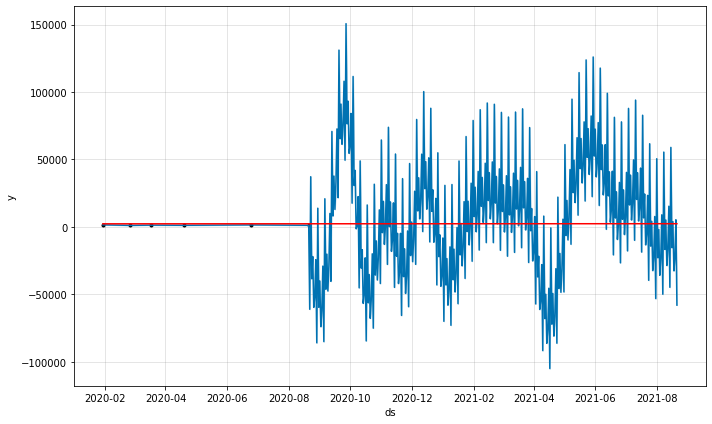

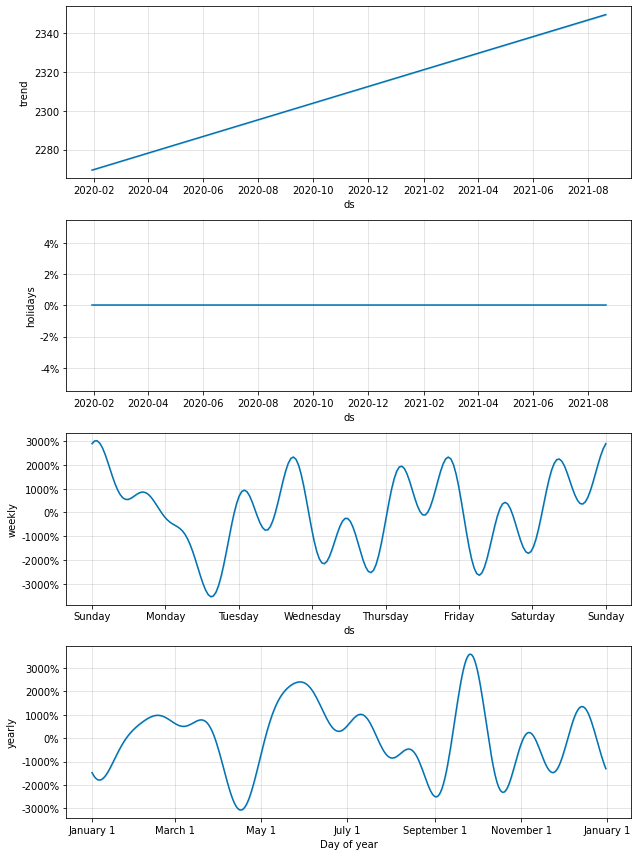

In [16]:
is_boram = df['동']=='보람동'
df_boram = df[is_boram].reset_index().drop(['index', '동'], axis=1)
df_boram
df_boram.columns=['y', 'ds']
df_boram.head()

# 예측
m = Prophet(
    changepoint_prior_scale=0.1,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    holidays=holiday,
    holidays_prior_scale=15)
m.fit(df_boram)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

### 종촌동 

In [18]:
is_jongchon = df['동']=='종촌동'
df_jongchon = df[is_jongchon].reset_index().drop(['index', '동'], axis=1)
df_jongchon
df_jongchon.columns=['y', 'ds']
df_jongchon.head()


,y,ds


### 고운동 

In [20]:
is_goun = df['동']=='고운동'
df_goun = df[is_goun].reset_index().drop(['index', '동'], axis=1)
df_goun
df_goun.columns=['y', 'ds']
df_goun.head()


,y,ds


### 아름동 

In [22]:
is_arum = df['동']=='아름동'
df_arum = df[is_arum].reset_index().drop(['index', '동'], axis=1)
df_arum
df_arum.columns=['y', 'ds']
df_arum.head()


,y,ds


### 어진동 

In [24]:
is_eojin = df['동']=='어진동'
df_eojin = df[is_eojin].reset_index().drop(['index', '동'], axis=1)
df_eojin
df_eojin.columns=['y', 'ds']
df_eojin.head()


,y,ds


### 연서면 

INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


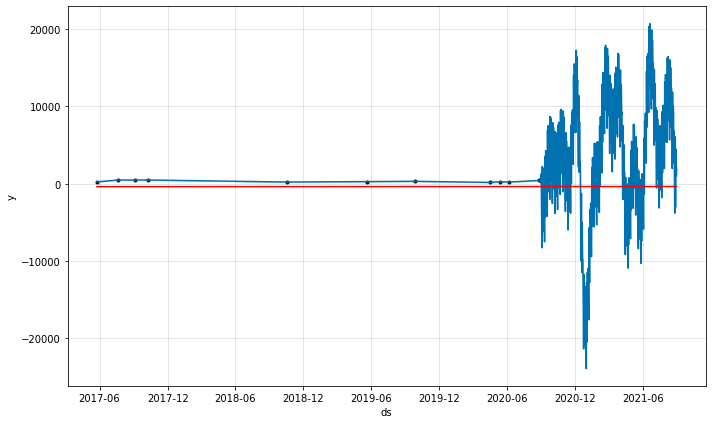

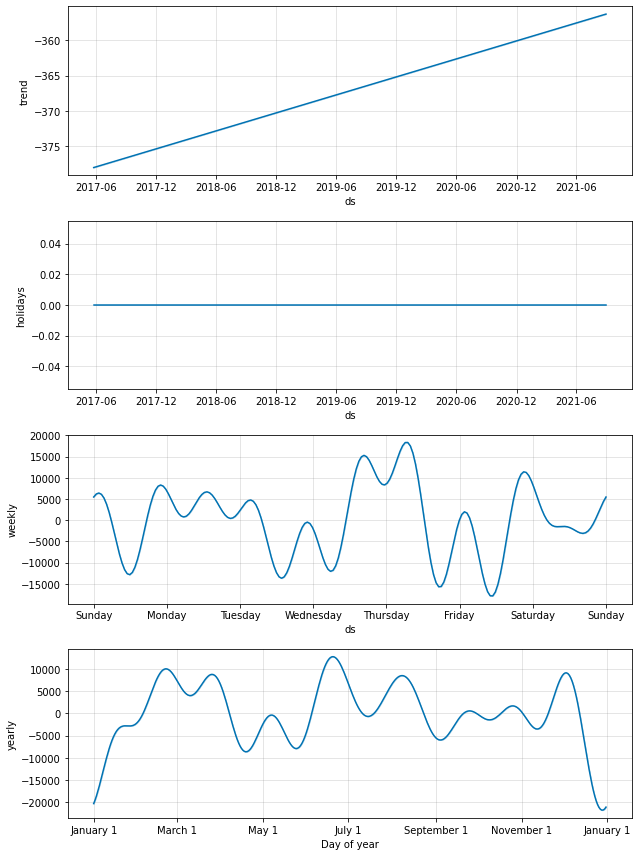

In [27]:
is_yeonseo = df['동']=='연서면'
df_yeonseo = df[is_yeonseo].reset_index().drop(['index', '동'], axis=1)
df_yeonseo
df_yeonseo.columns=['y', 'ds']
df_yeonseo.head()

# 예측
m = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='additive',
    holidays=holiday,
    holidays_prior_scale=15)
m.fit(df_yeonseo)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

### 조치원읍 

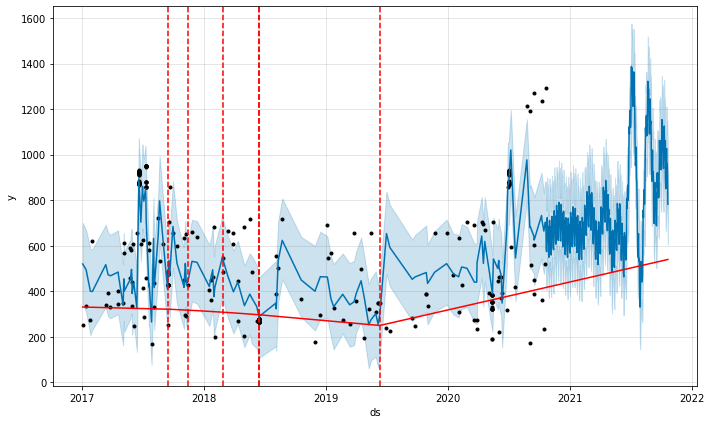

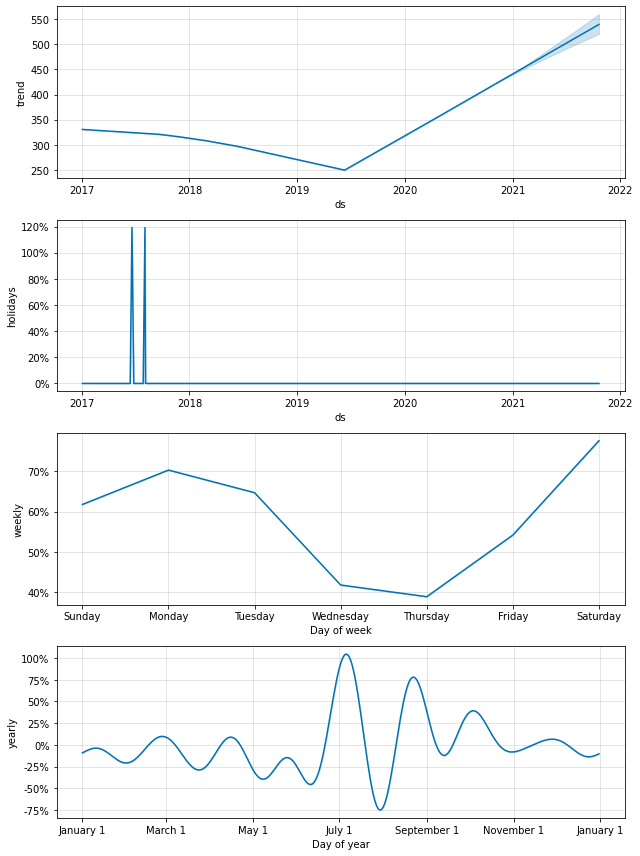

In [29]:
is_jochiwon = df['동']=='조치원읍'
df_jochiwon = df[is_jochiwon].reset_index().drop(['index', '동'], axis=1)
df_jochiwon
df_jochiwon.columns=['y', 'ds']
df_jochiwon.head()

# 예측
m = Prophet(
    changepoint_prior_scale=0.1,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    holidays=holiday,
    holidays_prior_scale=15)
m.fit(df_jochiwon)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

### 한솔동 

In [31]:
is_hansol = df['동']=='한솔동'
df_hansol = df[is_hansol].reset_index().drop(['index', '동'], axis=1)
df_hansol
df_hansol.columns=['y', 'ds']
df_hansol.head()


,y,ds


### 도담동

INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


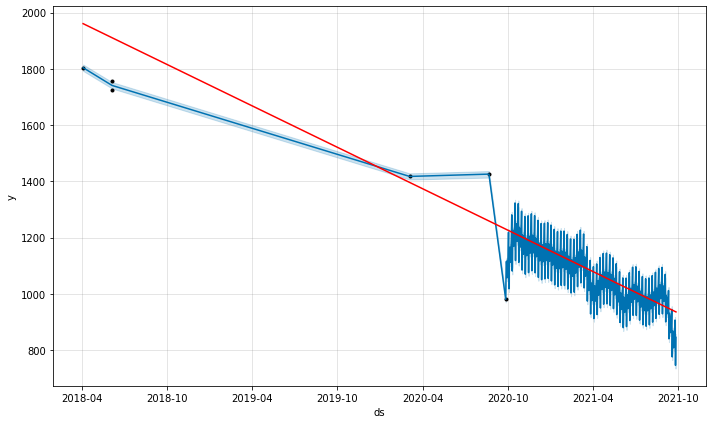

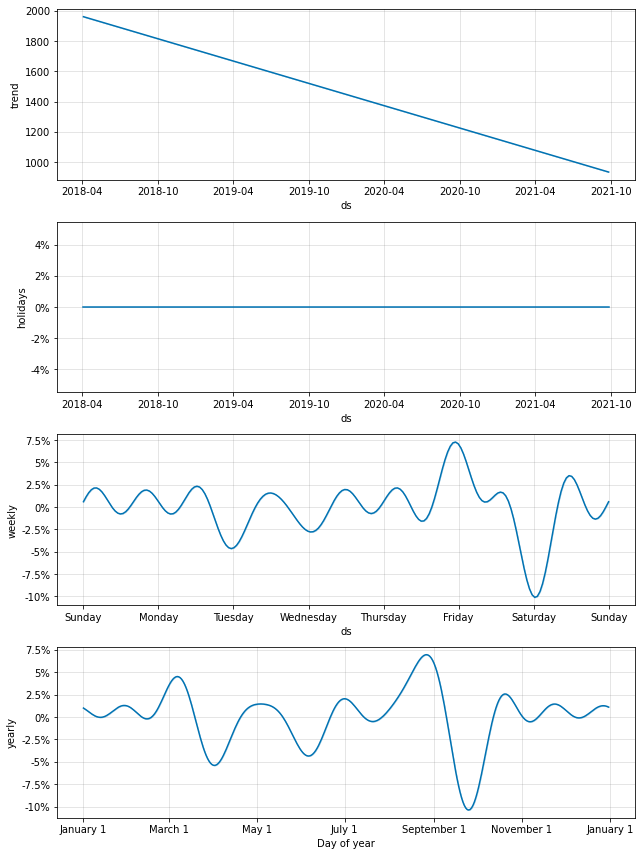

In [32]:
is_dodam = df['동']=='도담동'
df_dodam = df[is_dodam].reset_index().drop(['index', '동'], axis=1)
df_dodam
df_dodam.columns=['y', 'ds']
df_dodam.head()

# 예측
m = Prophet(
    changepoint_prior_scale=0.05,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    holidays=holiday,
    holidays_prior_scale=15)
m.fit(df_dodam)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

### 연동면 

In [34]:
is_yeondong = df['동']=='연동면'
df_yeondong = df[is_yeondong].reset_index().drop(['index', '동'], axis=1)
df_yeondong
df_yeondong.columns=['y', 'ds']
df_yeondong.head()


,y,ds


### 장군면 

INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


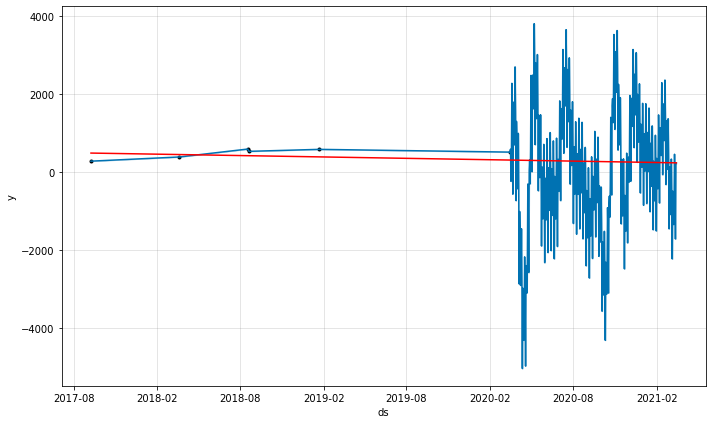

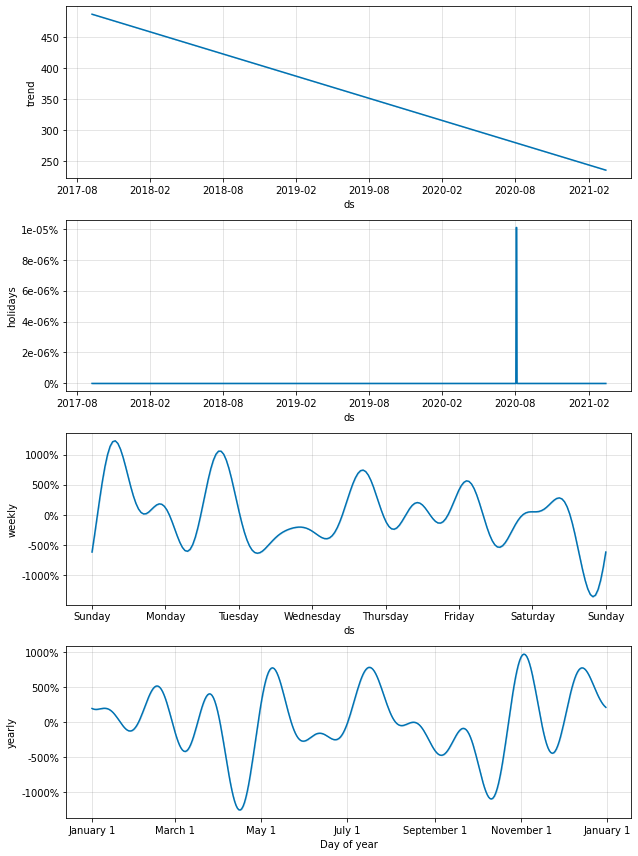

In [36]:
is_janggun = df['동']=='장군면'
df_janggun = df[is_janggun].reset_index().drop(['index', '동'], axis=1)
df_janggun
df_janggun.columns=['y', 'ds']
df_janggun.head()

# 예측
m = Prophet(
    changepoint_prior_scale=0.1,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    holidays=holiday,
    holidays_prior_scale=15)
m.fit(df_janggun)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

### 나성동 

In [38]:
is_naseong = df['동']=='나성동'
df_naseong = df[is_naseong].reset_index().drop(['index', '동'], axis=1)
df_naseong
df_naseong.columns=['y', 'ds']
df_naseong.head()


,y,ds


### 부강면

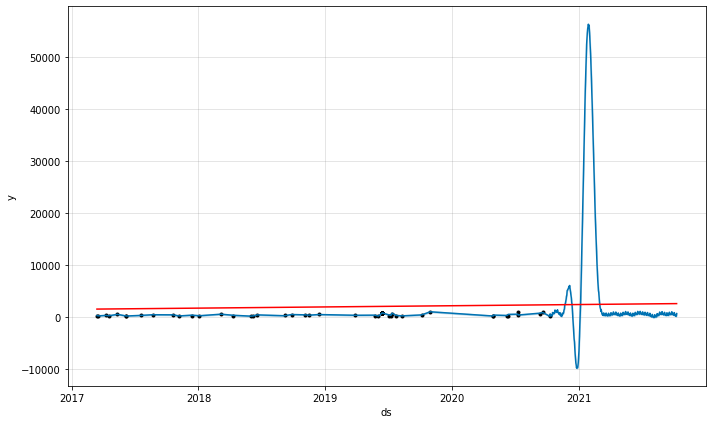

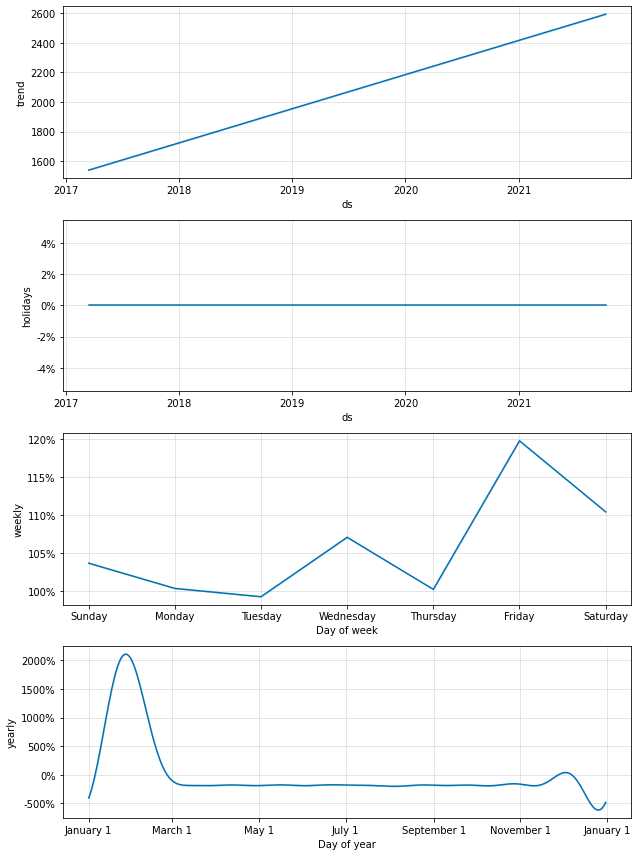

In [42]:
is_bugang = df['동']=='부강면'
df_bugang = df[is_bugang].reset_index().drop(['index', '동'], axis=1)
df_bugang
df_bugang.columns=['y', 'ds']
df_bugang.head()

# 예측
m = Prophet(
    changepoint_prior_scale=0.1,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    holidays=holiday,
    holidays_prior_scale=15)
m.fit(df_bugang)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

### 소담동 

INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


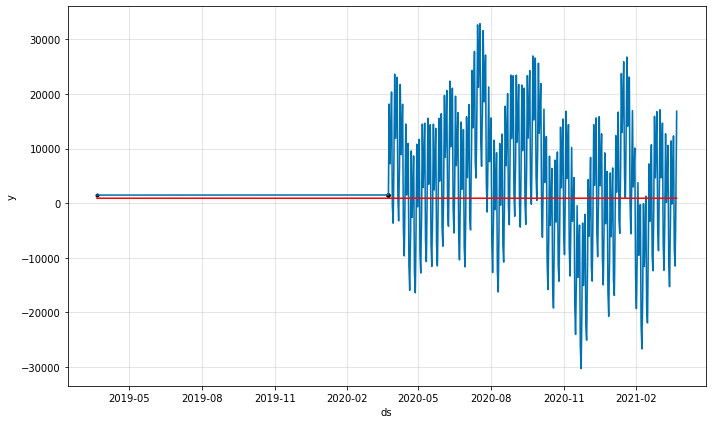

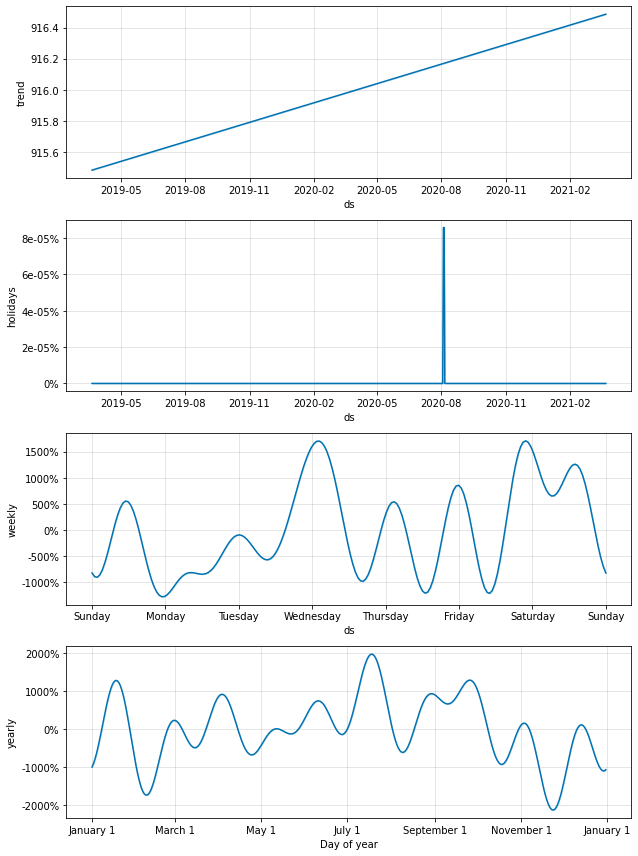

In [43]:
is_sodam = df['동']=='소담동'
df_sodam = df[is_sodam].reset_index().drop(['index', '동'], axis=1)
df_sodam
df_sodam.columns=['y', 'ds']
df_sodam.head()

# 예측
m = Prophet(
    changepoint_prior_scale=0.05,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    holidays=holiday,
    holidays_prior_scale=15)
m.fit(df_sodam)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)


### 금남면 

INFO:fbprophet:n_changepoints greater than number of observations. Using 13.


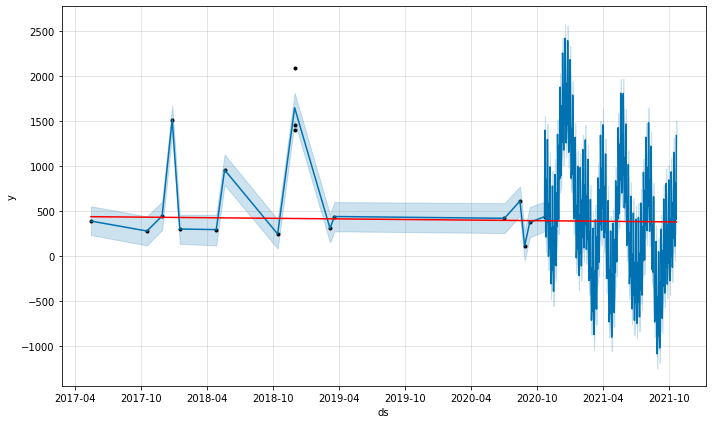

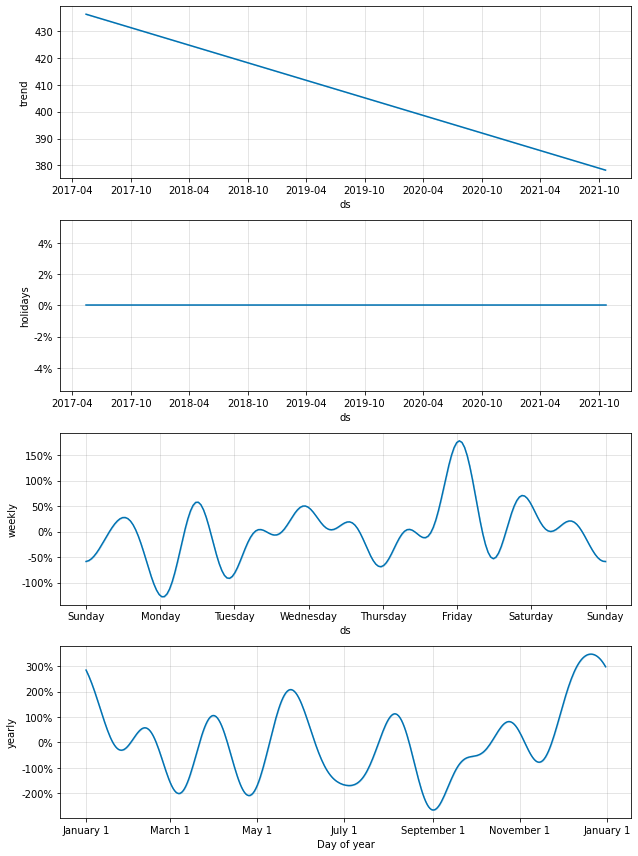

In [45]:
is_geumnam = df['동']=='금남면'
df_geumnam = df[is_geumnam].reset_index().drop(['index', '동'], axis=1)
df_geumnam
df_geumnam.columns=['y', 'ds']
df_geumnam.head()

# 예측
m = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    holidays=holiday,
    holidays_prior_scale=15)
m.fit(df_geumnam)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

### 전의면 

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


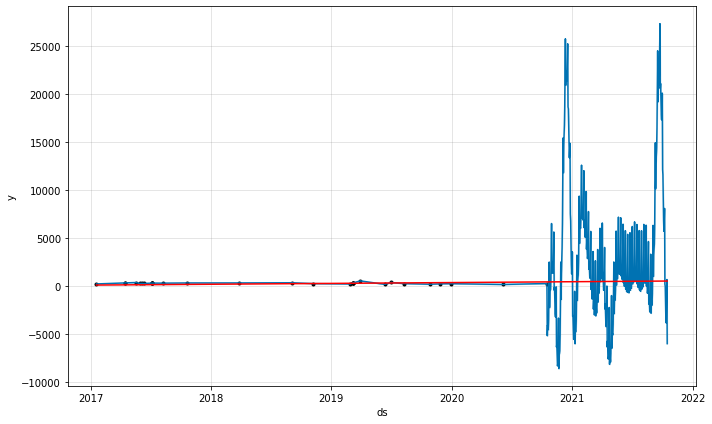

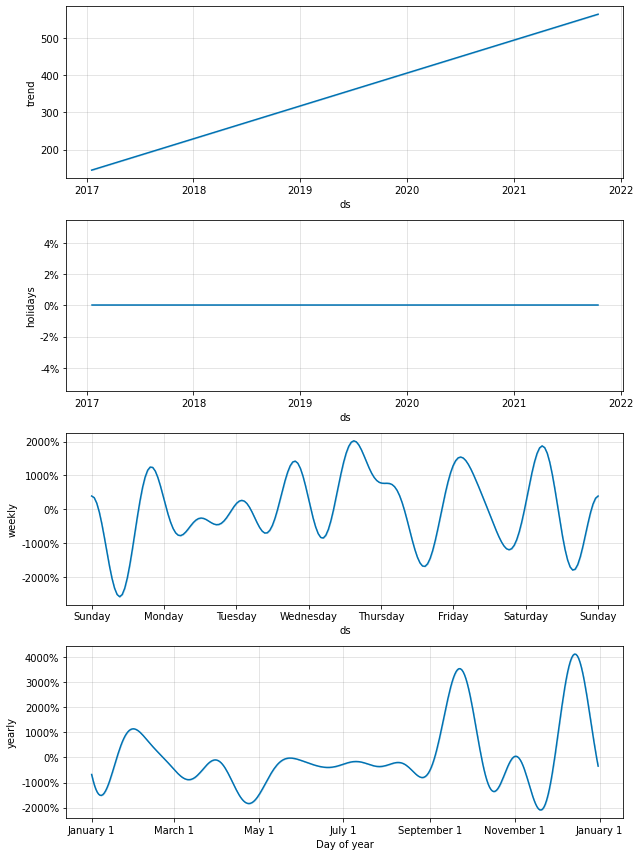

In [48]:
is_jeonui = df['동']=='전의면'
df_jeonui = df[is_jeonui].reset_index().drop(['index', '동'], axis=1)
df_jeonui
df_jeonui.columns=['y', 'ds']
df_jeonui.head()

# 예측
m = Prophet(
    changepoint_prior_scale=0.1,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    holidays=holiday,
    holidays_prior_scale=15)
m.fit(df_jeonui)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)


### 전동면 

INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


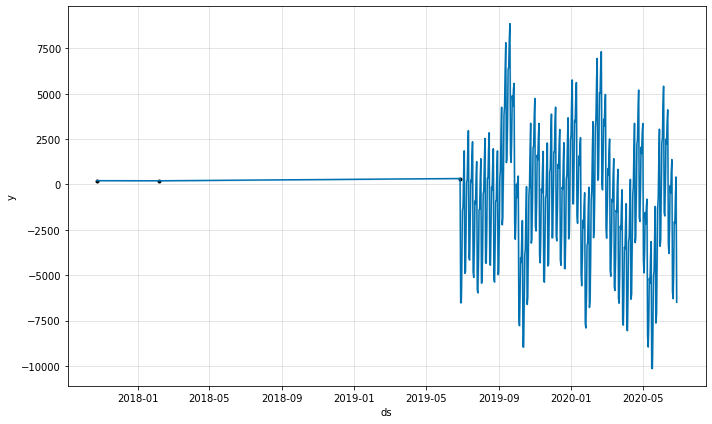

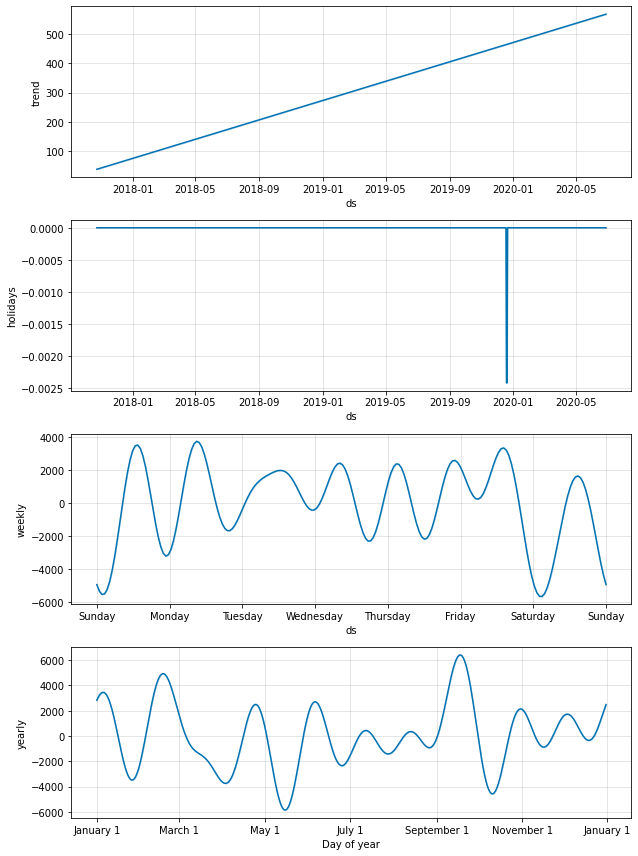

In [49]:
is_jeondong = df['동']=='전동면'
df_jeondong = df[is_jeondong].reset_index().drop(['index', '동'], axis=1)
df_jeondong
df_jeondong.columns=['y', 'ds']
df_jeondong.head()

# 예측
m = Prophet(
#    changepoint_prior_scale=0.05, # 데이터 값이 작으므로 chekpoint는 제외함. 
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='additive', # 데이터 볼륨이 적으므로 additive로 설정함.
    holidays=holiday,
    holidays_prior_scale=15)
m.fit(df_jeondong)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
fig1 = m.plot(forecast)
#a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

### 소정면 

INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


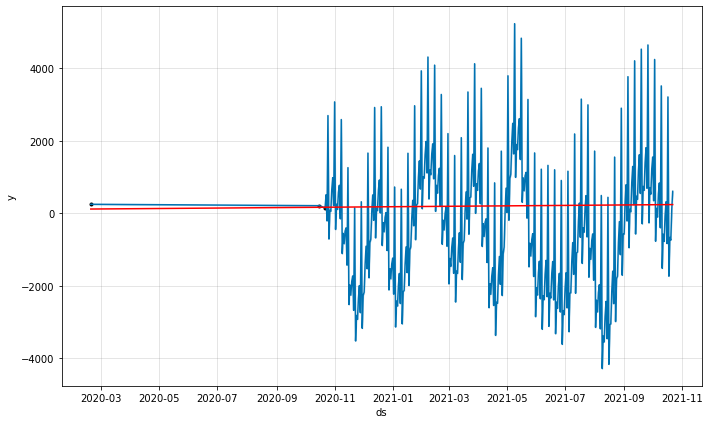

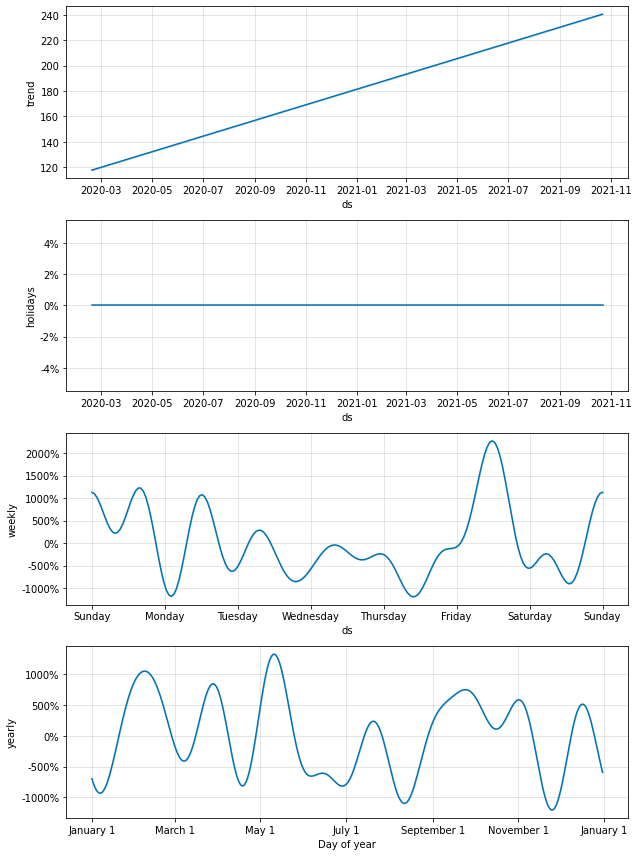

In [50]:
is_sojeong = df['동']=='소정면'
df_sojeong = df[is_sojeong].reset_index().drop(['index', '동'], axis=1)
df_sojeong
df_sojeong.columns=['y', 'ds']
df_sojeong.head()

# 예측
m = Prophet(
    changepoint_prior_scale=0.05,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    holidays=holiday,
    holidays_prior_scale=15)
m.fit(df_sojeong)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)


### 새롬동 

In [52]:
is_serom = df['동']=='새롬동'
df_serom = df[is_serom].reset_index().drop(['index', '동'], axis=1)
df_serom
df_serom.columns=['y', 'ds']
df_serom.head()


,y,ds


### 다정동

In [54]:
is_dajeong = df['동']=='다정동'
df_dajeong = df[is_dajeong].reset_index().drop(['index', '동'], axis=1)
df_dajeong
df_dajeong.columns=['y', 'ds']
df_dajeong.head()


,y,ds


### 대평동 

In [56]:
is_deapyeong = df['동']=='대평동'
df_deapyeong = df[is_deapyeong].reset_index().drop(['index', '동'], axis=1)
df_deapyeong
df_deapyeong.columns=['y', 'ds']
df_deapyeong.head()


,y,ds


### 반곡동 

INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


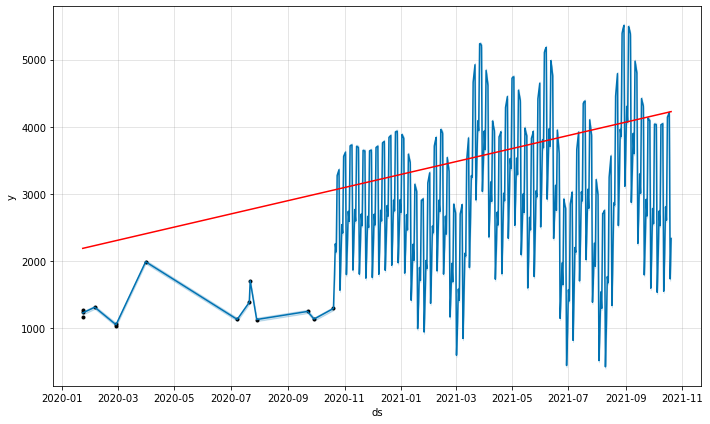

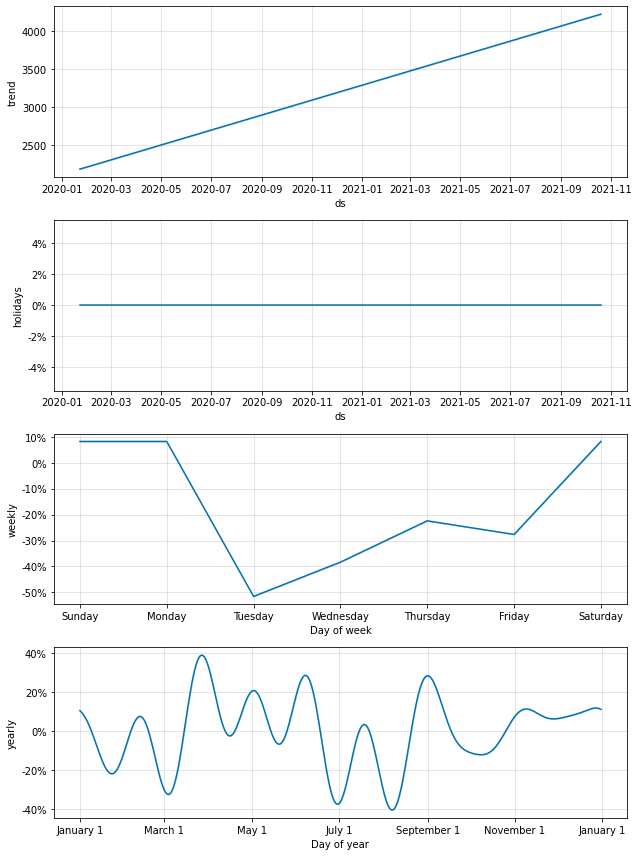

In [57]:
is_bangok = df['동']=='반곡동'
df_bangok = df[is_bangok].reset_index().drop(['index', '동'], axis=1)
df_bangok
df_bangok.columns=['y', 'ds']
df_bangok.head()

# 예측
m = Prophet(
    changepoint_prior_scale=0.5, 
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    holidays=holiday,
    holidays_prior_scale=15)
m.fit(df_bangok)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)